Exportaciones 2023  USD
Toneladas 2023

El valor USD 2023,  corresponde al precio de venta de los bienes colombianos embarcados a otros países.
Toneladas al volumen exportado 
TRansporte al método de transporte utilizado para mover las mercancías
Departamento Origen 

In [1]:
# Importar las librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Leer el archivo Excel como un Data Frame. El archivo excel corresponde a las exportaciones Colombia 2023. 
df = pd.read_excel(r'D:\nhenao\OneDrive - CAMARA DE COMERCIO DE CALI\Documentos\Maestria\Primer semestre\AED\Analisis-Bivariado\2023.xlsx')

In [3]:
## El método .info() de un dataframe nos devuelve información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147525 entries, 0 to 147524
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CAPÍTULO                         147525 non-null  int64  
 1   PARTIDA ARANCELARIA              147525 non-null  int64  
 2   Grupo                            147525 non-null  object 
 3   4 dígitos                        147525 non-null  int64  
 4   Desc 4                           147353 non-null  object 
 5   DESCRIPCIÓN PARTIDA ARANCELARIA  147509 non-null  object 
 6   NIT                              145264 non-null  float64
 7   RAZÓN SOCIAL EXPORTADOR          147525 non-null  object 
 8   LUGAR DE SALIDA                  147525 non-null  object 
 9   CÓDIGO PAÍS                      147525 non-null  object 
 10  PAÍS DESTINO                     147524 non-null  object 
 11  DEPARTAMENTO ORIGEN              147525 non-null  object 
 12  AD

In [4]:
#Dividir netos entre 1000 para obtener TONELADAS
df['TONELADAS'] = df['NETOS']/1000


In [5]:
# Mostrar el DataFrame resultante
df.head(5)

,CAPÍTULO,PARTIDA ARANCELARIA,Grupo,4 dígitos,Desc 4,DESCRIPCIÓN PARTIDA ARANCELARIA,NIT,RAZÓN SOCIAL EXPORTADOR,LUGAR DE SALIDA,CÓDIGO PAÍS,...,ADUANA EMBARQUE,UNIDAD,CANTIDAD UNIDADES,BRUTOS,NETOS,DÓLAR,PESOS,Clas.,TRANSPORTE,TONELADAS
0,56,5607500000,Textiles,5607,"Cordeles, cuerdas y cordajes, estén o no trenz...","Cordeles, cuerdas y cordajes de las demás fibr...",800191700.0,CUEROS VELEZ S.A.S,BOG,242,...,Medellin,KG,0.01,0.01,0.01,0.01,4.037000e+01,Sin minería. petróleo y sus derivados,Aéreo,0.00001
1,56,5607500000,Textiles,5607,"Cordeles, cuerdas y cordajes, estén o no trenz...","Cordeles, cuerdas y cordajes de las demás fibr...",800191700.0,CUEROS VELEZ S.A.S,BUN,211,...,Buenaventura,KG,0.02,0.02,0.02,0.01,4.213000e+01,Sin minería. petróleo y sus derivados,Marítimo,0.00002
2,56,5607500000,Textiles,5607,"Cordeles, cuerdas y cordajes, estén o no trenz...","Cordeles, cuerdas y cordajes de las demás fibr...",800191700.0,CUEROS VELEZ S.A.S,BUN,589,...,Buenaventura,KG,0.01,0.01,0.01,0.01,4.238000e+01,Sin minería. petróleo y sus derivados,Marítimo,0.00001
3,56,5607500000,Textiles,5607,"Cordeles, cuerdas y cordajes, estén o no trenz...","Cordeles, cuerdas y cordajes de las demás fibr...",800191700.0,CUEROS VELEZ S.A.S,CTG,317,...,Cartagena,KG,20.08,25.10,20.08,0.01,4.037000e+01,Sin minería. petróleo y sus derivados,Marítimo,0.02008
4,15,1507909000,"Alimentos, bebidas y tabaco",1507,Aceite de soja,Los demás aceites de soja (soya) y sus fraccio...,901386335.0,CI DISTRICOMERS S.A.S,BUN,215,...,Buenaventura,KG,29670650.00,29670650.00,29670650.00,46070665.20,1.992391e+11,Sin minería. petróleo y sus derivados,Marítimo,29670.65000


In [6]:
#Filtro el departamento del Valle del Cauca 
#Garantizar que las columnas DOLAR Y TONELADAS contengan solo números enteros,
df_valle = df[df['DEPARTAMENTO ORIGEN'] == 'VALLE DEL CAUCA.']
df_valle['DÓLAR'] = pd.to_numeric(df_valle['DÓLAR'], errors='coerce').fillna(0).astype(int)
df_valle['TONELADAS'] = pd.to_numeric(df_valle['TONELADAS'], errors='coerce').fillna(0).astype(int)



C:\Users\nhenao\AppData\Local\Temp\ipykernel_29824\2648605388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valle['DÓLAR'] = pd.to_numeric(df_valle['DÓLAR'], errors='coerce').fillna(0).astype(int)
C:\Users\nhenao\AppData\Local\Temp\ipykernel_29824\2648605388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valle['TONELADAS'] = pd.to_numeric(df_valle['TONELADAS'], errors='coerce').fillna(0).astype(int)


In [19]:
#Del filtrado Valle del Cauca tomo únicamente las variables a continuación
df_seleccionado = df_valle[['TRANSPORTE', 'TONELADAS', 'DÓLAR','RAZÓN SOCIAL EXPORTADOR']]
df_seleccionado.head()

,TRANSPORTE,TONELADAS,DÓLAR,RAZÓN SOCIAL EXPORTADOR
4,Marítimo,29670,46070665,CI DISTRICOMERS S.A.S
20,Marítimo,8672,37984391,GOODYEAR DE COLOMBIA S.A.
119,Marítimo,8480,31272167,CLARIOS ANDINA S. A. S.
208,Marítimo,13617,30600197,SUCROAL S.A.
214,Marítimo,27002,26313811,C.I. TOP S.A.


In [25]:
#Verifico que coincida el total filtrado 
Dólar2023= df_seleccionado['DÓLAR'].sum()
print(f"La suma total de la columna DÓLAR Valle del Cauca es: {Dólar2023}")

#Verifico toneladas
Toneladas2023= df_seleccionado['TONELADAS'].sum()
print(f"La suma total de la columna DÓLAR Valle del Cauca es: {Toneladas2023}")

La suma total de la columna DÓLAR Valle del Cauca es: 2421266889
La suma total de la columna DÓLAR Valle del Cauca es: 1434822


Existe una relación positiva entre el valor exportado en DÓLAR y TONELADAS, es decir, a medida que aumenta el volumen exportado aumenta el valor en dólares. Hay un grupo considerable de puntos concentrados cerca del origen (es decir, bajas toneladas y bajos dólares), pero también hay puntos que se alejan de la línea, tanto por encima como por debajo de ella. Aunque existe una tendencia positiva general (más toneladas suelen asociarse con más dólares), existen puntos (outliers) que no siguen este patrón y tienen validez debido a  la variabilidad en cómo las toneladas se traducen en dólares, lo que podría deberse a diversos factores como: exportaciones de productos de muy alto valor por tonelada (ej: pideras preciosas)

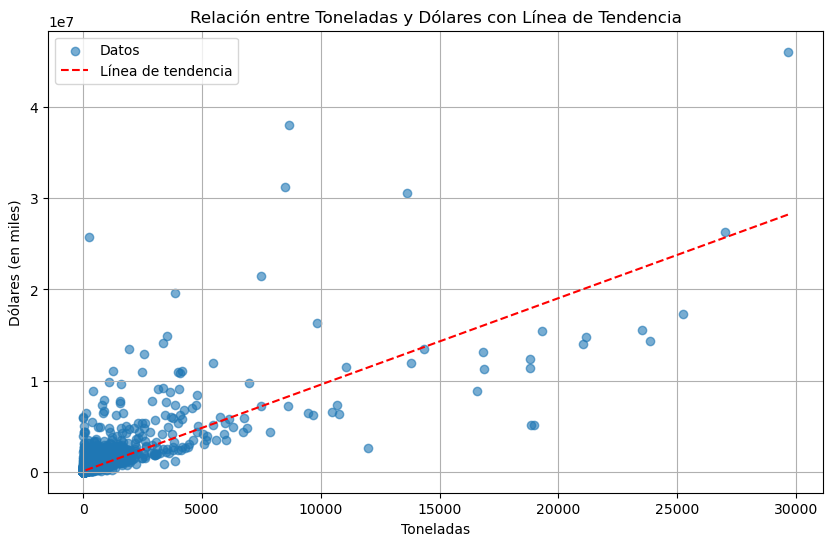

In [8]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_seleccionado['TONELADAS'], df_seleccionado['DÓLAR'], alpha=0.6, label='Datos')

# Ajustar una línea de tendencia
z = np.polyfit(df_seleccionado['TONELADAS'], df_seleccionado['DÓLAR'], 1)
p = np.poly1d(z)
plt.plot(df_seleccionado['TONELADAS'], p(df_seleccionado['TONELADAS']), "r--", label='Línea de tendencia')

# Añadir etiquetas y título
plt.title('Relación entre Toneladas y Dólares con Línea de Tendencia')
plt.xlabel('Toneladas')
plt.ylabel('Dólares (en miles)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

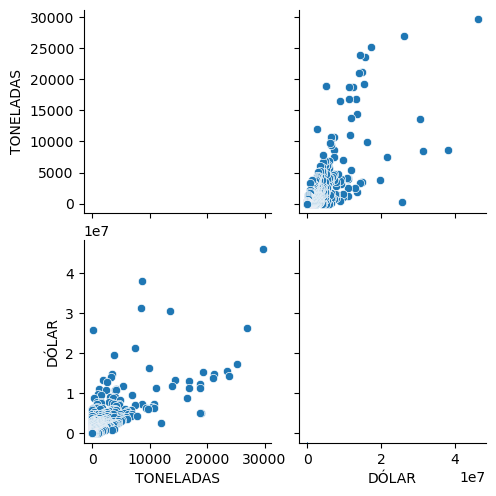

In [9]:
#Crear un pairplot
sns.pairplot(df_seleccionado[['TONELADAS', 'DÓLAR']])
plt.show()

Dada una correlación de 0.77 existe entonces una relación positiva moderada entre el volumen exportado en toneladas y el valor en dólares. 

In [11]:
# Calcular la correlación entre toneladas y dólares
correlation = df_seleccionado[['TONELADAS', 'DÓLAR']].corr().iloc[0, 1]
print(f"Correlación entre toneladas y dólares: {correlation:.2f}")

Correlación entre toneladas y dólares: 0.77


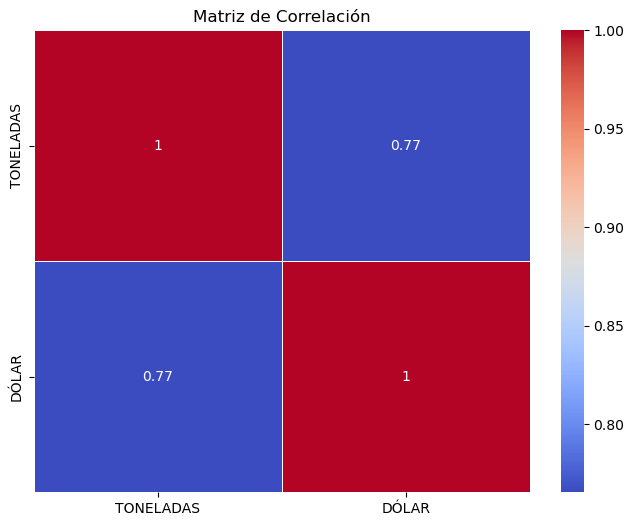

In [12]:
# Seleccionar las columnas relevantes para la correlación
correlation_matrix = df_seleccionado[['TONELADAS', 'DÓLAR']].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Respecto al modo de transporte, el transporte marítimo domina las exportaciones con mayores volúmenes y valores, mientras que el transporte aéreo está más asociado con menores volúmenes y valores. Por tanto, maritimo tiene en promedio transacciones de mayor valor y mayor variabilidad, seguido por terrestre y aereo. La presencia de outliers en todos los grupos reafirma que existen transacciones con valores significativamente más altos que el promedio, lo que podría deberse a productos específicos o condiciones de mercado excepcionales.

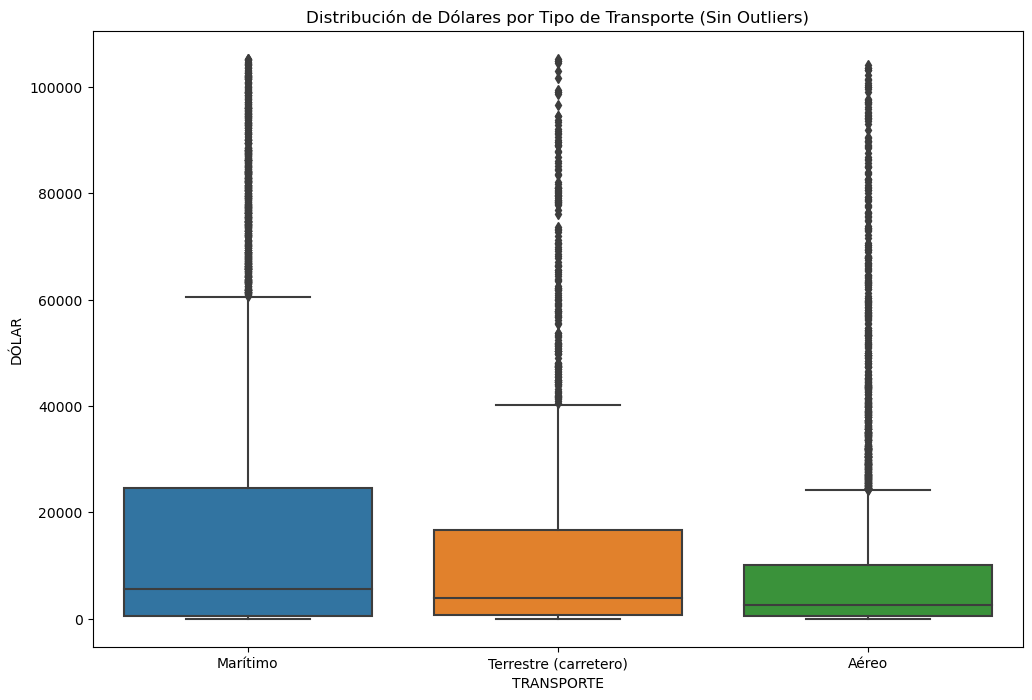

In [13]:
# Calcular el IQR y filtrar outliers
Q1 = df_seleccionado['DÓLAR'].quantile(0.25)
Q3 = df_seleccionado['DÓLAR'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos
df_filtrado = df_seleccionado[~((df_seleccionado['DÓLAR'] < (Q1 - 1.5 * IQR)) | (df_seleccionado['DÓLAR'] > (Q3 + 1.5 * IQR)))]

# Crear un boxplot sin outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='TRANSPORTE', y='DÓLAR', data=df_filtrado)
plt.title('Distribución de Dólares por Tipo de Transporte (Sin Outliers)')
plt.xlabel('TRANSPORTE')
plt.ylabel('DÓLAR')

plt.show()

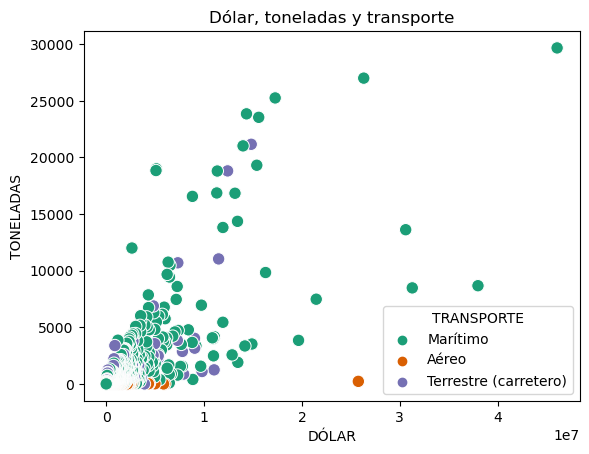

In [14]:
# Relación entre Proline, Flavanoids y Vino
# Esta grafica nos permite ver que relaciones existen y como podemos analizarlo
 
# Gráfico de dispersión con DÓLARMIL y TONELADAS, coloreado por TRANSPORTE
sns.scatterplot(x="DÓLAR", y="TONELADAS", hue="TRANSPORTE", data=df_seleccionado, palette="Dark2", s=80)
plt.title("Dólar, toneladas y transporte")
plt.show()